Kolejnym zadaniem z dziedziny elektrotechniki było rozwiązanie problemu maksymalizacji prądu płynącego przez dwójnik, czyli jaki maksymalny prąd może płynąć przez dwójnik przy znanych wartościach rezystancji oraz maksymalnych prądów mogących płynąć przez dany rezystor. 

Układ:

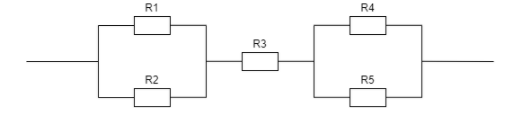

Dane:

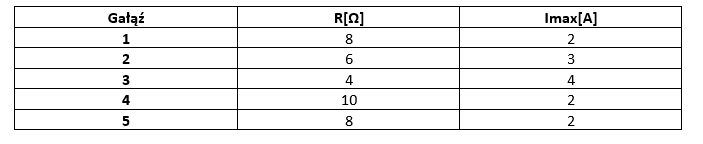


Zmiennymi decyzyjnymi były prądy, ograniczone od "góry" i od "dołu". 

Ograniczenia jakie występują to maksymalne prądy przepływające "górny" zakres oraz zależności wynikające z praw Kirchoffa.

W wyniku programu otrzymujemy wszystkie prądy oraz wyróżniony największy prąd.

Standardowa instalacja pulpa

In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

In [2]:
from pulp import *
import numpy as np

# Name and type of problem
prob = LpProblem("The current problem",LpMaximize)

# The 5 variables of currents
i1=LpVariable("I1", 0, 2, LpContinuous)
i2=LpVariable("I2", 0, 3, LpContinuous)
i3=LpVariable("I3", 0, 4, LpContinuous)
i4=LpVariable("I4", 0, 2, LpContinuous)
i5=LpVariable("I5", 0, 2, LpContinuous)
 
# Constants of resistances
R = (8.0, 6.0, 4.0, 10.0, 8.0)

# The main function for sum of currents in the circuit
prob += i1+i2+i3+i4+i5, "max current"

# Constraints resulting from Kirchhoff's current and voltage laws
prob += i1+i2 == i3, "1" 
prob += i3-i4 == i5, "2"
prob += i1*R[0] - i2*R[1] == 0, "3"
prob += i4*R[3] - i5*R[4] == 0, "4"

prob.writeLP("Resistance_circuit.lp")

# The solution of problem
prob.solve()
print("Status of problem:", LpStatus[prob.status], "\n")

# List currents and find the greatest one
Imax = 0
for v in prob.variables():
    print(v.name, "=", v.varValue, "A")
    if (v.varValue >= Imax):
      Imax = v.varValue 
print()

print("Imax = ", Imax, "A\n")

Status of problem: Optimal 

I1 = 1.5428571 A
I2 = 2.0571429 A
I3 = 3.6 A
I4 = 1.6 A
I5 = 2.0 A

Imax =  3.6 A



/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
